## Logistic Regression with cost and gradient descent Using scipy.optimize
*opt.fmin_tnc()*
### Includes plotting

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
path = 'https://raw.githubusercontent.com/Gurubux/SelfStudyNotes/master/Linear_Regression/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

Text(0, 0.5, 'Exam 1 Score')

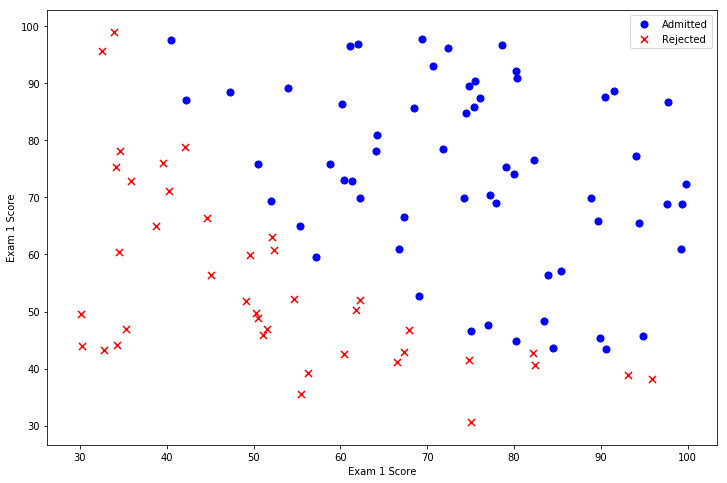

In [2]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 1 Score')

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad
  
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [0]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

In [0]:

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

#print(X.head())
#print(y.head())
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [0]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)

In [7]:
cost(theta, X, y)

0.6931471805599453

In [8]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
theta_min = np.matrix(result[0])
print(result)
cost(result[0], X, y)


(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)


0.20349770158947458

In [9]:
X[:5],theta_min[:5]

(array([[ 1.        , 34.62365962, 78.02469282],
        [ 1.        , 30.28671077, 43.89499752],
        [ 1.        , 35.84740877, 72.90219803],
        [ 1.        , 60.18259939, 86.3085521 ],
        [ 1.        , 79.03273605, 75.34437644]]),
 matrix([[-25.16131863,   0.20623159,   0.20147149]]))

In [10]:
predictions = predict(theta_min, X)
predictions[:5],type(predictions)

([0, 0, 0, 1, 1], list)

In [11]:
X[:5],type(X)

(array([[ 1.        , 34.62365962, 78.02469282],
        [ 1.        , 30.28671077, 43.89499752],
        [ 1.        , 35.84740877, 72.90219803],
        [ 1.        , 60.18259939, 86.3085521 ],
        [ 1.        , 79.03273605, 75.34437644]]), numpy.ndarray)

In [12]:
theta_min[:5],type(theta_min)

(matrix([[-25.16131863,   0.20623159,   0.20147149]]), numpy.matrix)

In [13]:
(X * theta_min.T)[:5]

matrix([[ -2.30107548],
        [-10.07165177],
        [ -3.08073639],
        [  4.63894671],
        [  6.31747157]])

In [14]:
import seaborn as sns
w = np.squeeze(np.asarray((X * theta_min.T).reshape(1,-1)))
t = np.squeeze(np.asarray(sigmoid(X * theta_min.T).reshape(1,-1)))
new_df = pd.DataFrame({"w":w,"t":t,"predictions":predictions})
new_df.head()

,w,t,predictions
0,-2.301075,0.091034,0
1,-10.071652,0.000042,0
2,-3.080736,0.043909,0
3,4.638947,0.990425,1
4,6.317472,0.998199,1


In [15]:
w[:5]

array([ -2.30107548, -10.07165177,  -3.08073639,   4.63894671,
         6.31747157])

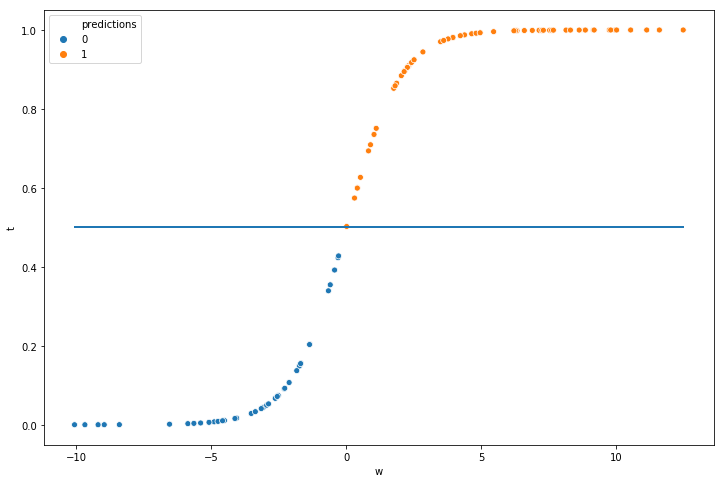

In [16]:

fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x='w', y='t',
              hue='predictions', data=new_df); 
ax.plot([np.min(w), np.max(w)], [0.5, 0.5], linewidth=2)

[-25.16131863   0.20623159   0.20147149]
-25.16131862777957 0.20623158859990537 0.2014714861690025


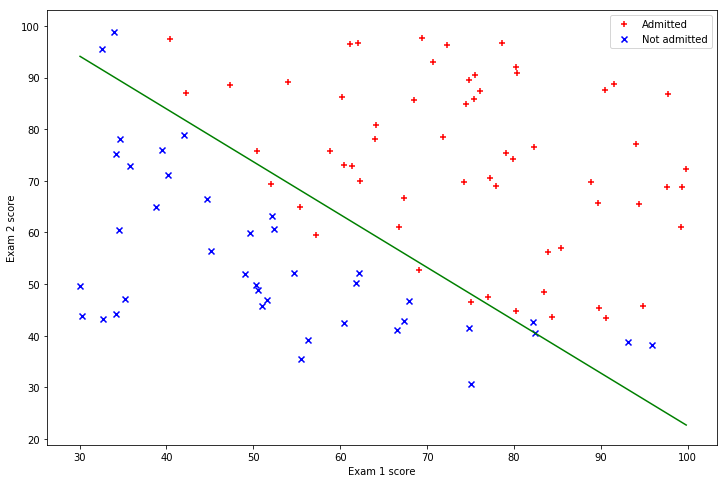

In [17]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
print(np.squeeze(np.asarray(theta_min.reshape(1,-1))))
theta_min = np.squeeze(np.asarray(theta_min.reshape(1,-1)))
print(theta_min[0],theta_min[1],theta_min[2])
y_value=-(theta_min[0] +theta_min[1]*x_value)/theta_min[2]

ax.plot(x_value,y_value, "g")
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
ax.legend(loc=0)

In [18]:
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


**References** :

[*link 1*](https://github.com/Benlau93/Machine-Learning-by-Andrew-Ng-in-Python/blob/master/LogisticRegression/ML_LogisticRegression.ipynb)

[*John Wittenauer*](https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-3/)

[*Benjamin Lau*](https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-regularized-logistic-regression-lasso-regression-721f311130fb)

In [0]:
data.head()
data = data.iloc[:,1:]

# Assumptions and analysys steps

## Assumption Of Continuous IVs Being Linearly Related To The **Log Odds**

Text(0.5, 1.0, 'Exam 1 Log Odds Linear Plot')

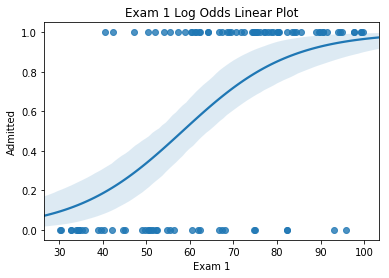

In [20]:
sns.regplot(x= 'Exam 1', y= 'Admitted', data= data, logistic= True).set_title("Exam 1 Log Odds Linear Plot")
#gre.figure.savefig("gre log lin.png")

Text(0.5, 1.0, 'Exam 2 Log Odds Linear Plot')

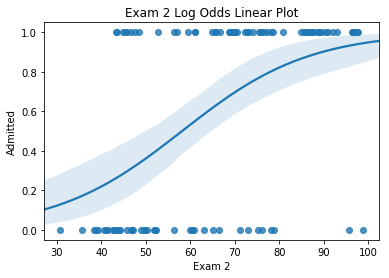

In [21]:
sns.regplot(x= 'Exam 2', y= 'Admitted', data= data, logistic= True).set_title("Exam 2 Log Odds Linear Plot")
#gpa.figure.savefig("gpa log lin.png")

## ASSUMPTION OF THE ABSENCE OF MULTICOLLINEARITY

In [0]:
from scipy.stats.stats import pearsonr,spearmanr
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor





### VIF

In [23]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
vif

,VIF Factor,features
0,7.676457,Exam 1
1,7.151108,Exam 2
2,3.762641,Admitted


### pearsonr and spearmanr

In [24]:
pearsonr(data['Exam 1'], data['Exam 2'])

(-0.023664586253294567, 0.8152152827846564)

In [25]:
spearmanr(data['Exam 1'], data['Exam 2'])

SpearmanrResult(correlation=-0.0372997299729973, pvalue=0.7125481177278083)

### chi2_contingency

In [26]:
from scipy.stats import chi2_contingency
table = pd.crosstab(data['Exam 1'], data['Exam 2'])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))
#>>>Chi-square Statistic 9900.000 p_value 0.239

Chi-square Statistic 9900.000 p_value 0.239


### df.corr()

In [27]:
data.corr()

,Exam 1,Exam 2,Admitted
Exam 1,1.000000,-0.023665,0.574057
Exam 2,-0.023665,1.000000,0.512323
Admitted,0.574057,0.512323,1.000000


## ASSUMPTION OF LACK OF OUTLIERS

Text(0.5, 1.0, 'Exam 1 Box Plot')

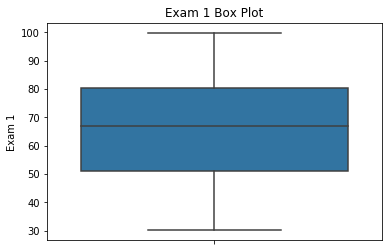

In [28]:
sns.boxplot(x= 'Exam 1', data= data, orient= 'v').set_title("Exam 1 Box Plot")

Text(0.5, 1.0, 'Exam 2 Box Plot')

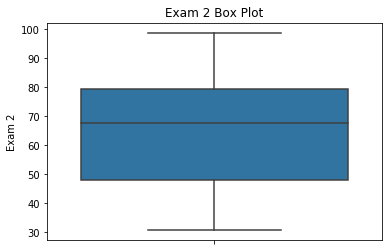

In [29]:
sns.boxplot(x= 'Exam 2', data= data, orient= 'v').set_title("Exam 2 Box Plot")

# Visualizations

In [30]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [0]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()

## Learning Curve

train_sizes  [0.2 0.4 0.6 0.8 1. ]
train_sizes [16 32 48 64 80]
train_scores_mean, train_scores_std, test_scores_mean,test_scores_std 
 [0.731875   0.7590625  0.78458333 0.81984375 0.836625  ] 
 [0.08066859 0.06991834 0.05797659 0.04160213 0.03073348] 
 [0.652  0.7185 0.7645 0.8005 0.83  ] 
 [0.11914697 0.11525081 0.11710999 0.10828088 0.0969536 ]


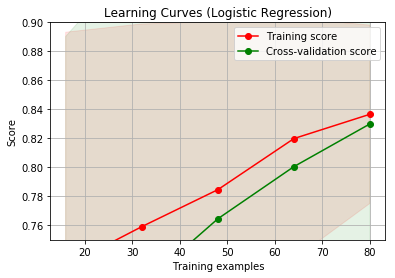

In [32]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.2, 1.0, 5)):
    plt.figure()
    plt.title(title)
    print("train_sizes ",train_sizes)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    print("train_sizes",train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print("train_scores_mean, train_scores_std, test_scores_mean,test_scores_std \n",train_scores_mean,"\n", train_scores_std,"\n", test_scores_mean,"\n",test_scores_std)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - 2*train_scores_std,
                     train_scores_mean + 2*train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - 2*test_scores_std,
                     test_scores_mean + 2*test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

X, y = data.iloc[:,:-1].values, data.iloc[:,-1].values
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(estimator, title, X, y, ylim=(0.75, 0.90), cv=cv, n_jobs=4)
plt.show()



## Correlation Coefficient

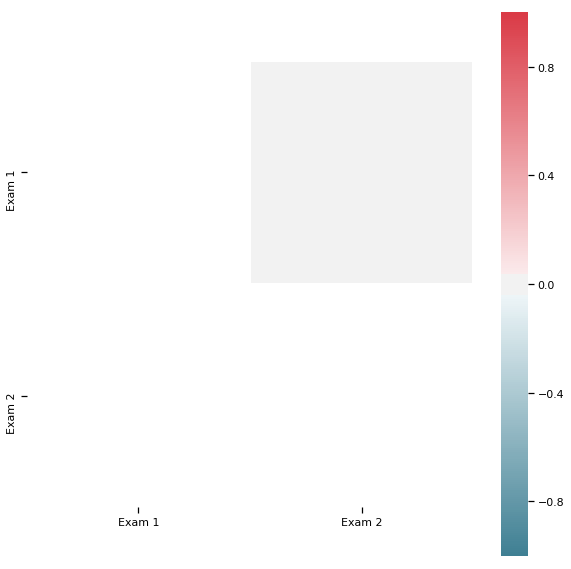

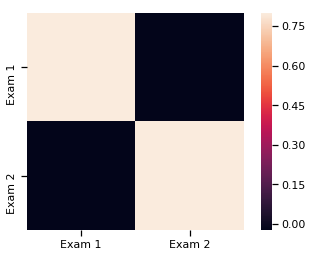

In [33]:
corr = data.iloc[:,:-1].corr()

## Type 1
def plot_Correlation_Coefficient_1(corr):
    sns.set_context(context='notebook')
    fig, ax = plt.subplots(figsize=(10,10)) 

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.tril_indices_from(mask)] = True
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)
    plt.show()

## Type 2
def plot_Correlation_Coefficient_2(corr):
    sns.heatmap(corr, vmax=.8, square=True);
    plt.show()
plot_Correlation_Coefficient_1(corr)
plot_Correlation_Coefficient_2(corr)

# Evaluation Metrices

In [0]:
pred_train = estimator.predict(X_train)
pred_test = estimator.predict(X_test)

## Confusion Matrix

In [0]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true,y_pred, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    classes=["Admitted", "NotAdmitted"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [75]:
predictions_ = estimator.predict(X_test) #for Confusion Matrix
predictions_

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [79]:
tn, fp, fn, tp = confusion_matrix(y_test, estimator.predict(X_test)).ravel()
print(tn, fp, fn, tp)

9 5 1 25


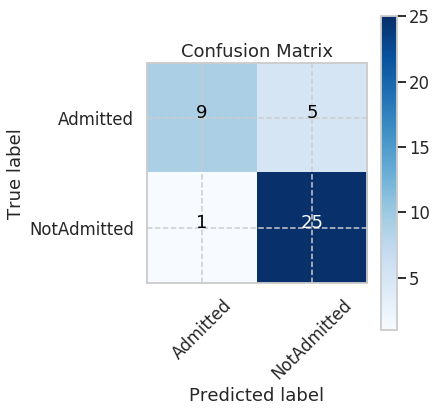

In [80]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_test,predictions_, normalize=False)
plt.show()

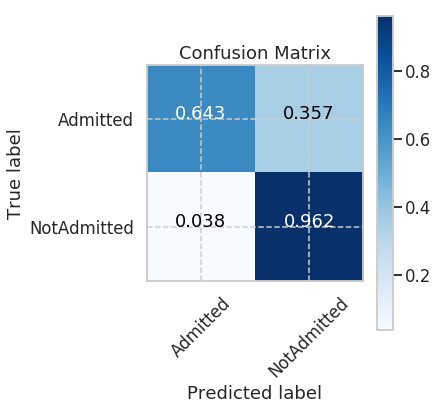

In [81]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_test,predictions_, normalize=True)
plt.show()

In [43]:
X_test_ = X_test.values
m , n = X_test_.shape[0], X_test_.shape[1]
X_test_= np.append(np.ones((m,1)),X_test_,axis=1)
X_test_[:5],theta_min[:5]

(array([[ 1.        , 57.23870632, 59.51428198],
        [ 1.        , 34.52451385, 60.39634246],
        [ 1.        , 32.72283304, 43.30717306],
        [ 1.        , 62.22267576, 52.06099195],
        [ 1.        , 51.04775177, 45.82270146]]),
 array([-25.16131863,   0.20623159,   0.20147149]))

In [83]:

tn, fp, fn, tp = confusion_matrix(y_test, np.asarray(predict(np.matrix(theta_min), X_test_))).ravel()
print(tn, fp, fn, tp)

13 1 3 23


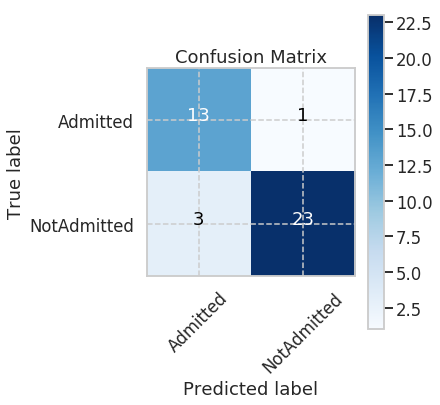

In [45]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(np.asarray(predict(np.matrix(theta_min), X_test_)), normalize=False)
plt.show()

## Accuracy - score()

In [66]:
X_train_ = X_train.values
m , n = X_train_.shape[0], X_train_.shape[1]
X_train_= np.append(np.ones((m,1)),X_train_,axis=1)
X_train_[:5],theta_min[:5]
pred_test_scratch = np.asarray(predict(np.matrix(theta_min), X_test_))
pred_train_scratch = np.asarray(predict(np.matrix(theta_min), X_train_))

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(pred_train_scratch, y_train.values)]
accuracy = (sum(correct) / len(correct))*100
print('Train Scratch accuracy = {0}%'.format(accuracy))

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(pred_test_scratch, y_test)]
accuracy = (sum(correct) / len(correct))*100
print('Test Scratchaccuracy = {0}%'.format(accuracy))

Train Scratch accuracy = 88.33333333333333%
Test Scratchaccuracy = 90.0%


In [69]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_test))
estimator.score(X_train,y_train),estimator.score(X_test,y_test),X_test.shape

0.85


(0.9, 0.85, (40, 2))

## from sklearn.metrics import 
 Jaccard_similarity_score(y_true, y_pred)
 
 confusion_matrix(y_true, y_pred)
 
 classification_report(y_true, y_pred)
 
  log_loss(y_true, y_pred)

In [49]:
from sklearn.metrics import jaccard_score,confusion_matrix,classification_report,log_loss
print(jaccard_score(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))
print(log_loss(y_test, pred_test))

print(jaccard_score(y_test, pred_test_scratch))
print(confusion_matrix(y_test, pred_test_scratch))
print(classification_report(y_test, pred_test_scratch))
print(log_loss(y_test, pred_test_scratch))

0.8064516129032258
[[ 9  5]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.83      0.96      0.89        26

    accuracy                           0.85        40
   macro avg       0.87      0.80      0.82        40
weighted avg       0.86      0.85      0.84        40

5.180916408915378
0.8518518518518519
[[13  1]
 [ 3 23]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.96      0.88      0.92        26

    accuracy                           0.90        40
   macro avg       0.89      0.91      0.89        40
weighted avg       0.91      0.90      0.90        40

3.453897629426824


In [0]:
# predict probabilities
probs = estimator.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

## ROC AUC 
### roc_curve,auc,roc_auc_score

In [54]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# calculate roc_curve(y-true,y_score(probs)) : fpr, tpr
fpr, tpr, _ = roc_curve(y_test, probs)

# calculate AUC 
auc = auc(fpr, tpr)

# calculate roc_auc_score(y_true,y_score(prob))
roc_auc_score = roc_auc_score(y_test, probs)
print(f'Roc_Curve: FPR, TPR, _ \nFPR:  {fpr},\nTPR:  {tpr},\n_:  {_},\nAUC:  {auc},\nRoc_Auc_score:  {roc_auc_score}')


Roc_Curve: FPR, TPR, _ 
FPR:  [0.         0.         0.         0.07142857 0.07142857 0.28571429
 0.28571429 0.35714286 0.35714286 1.        ],
TPR:  [0.         0.03846154 0.23076923 0.23076923 0.76923077 0.76923077
 0.80769231 0.80769231 1.         1.        ],
_:  [1.88413856 0.88413856 0.78509455 0.7769698  0.60063335 0.54384988
 0.53571757 0.53357146 0.48333915 0.25522208],
AUC:  0.8818681318681318,
Roc_Auc_score:  0.8818681318681318


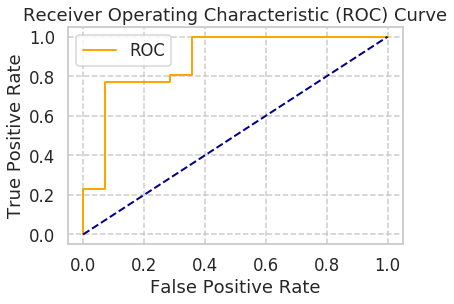

In [53]:
#ROC CURVE PLOT
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

## Precision Recall Curve 
**precision_recall_curve**, **auc**, average_precision_score, f1_score

[0.83870968 0.83333333 0.82758621 0.82142857 0.81481481 0.80769231
 0.84       0.83333333 0.86956522 0.90909091 0.95238095 0.95
 0.94736842 0.94444444 0.94117647 0.9375     0.93333333 0.92857143
 0.92307692 0.91666667 0.90909091 0.9        0.88888889 0.875
 0.85714286 1.         1.         1.         1.         1.
 1.         1.        ] 
 [1.         0.96153846 0.92307692 0.88461538 0.84615385 0.80769231
 0.80769231 0.76923077 0.76923077 0.76923077 0.76923077 0.73076923
 0.69230769 0.65384615 0.61538462 0.57692308 0.53846154 0.5
 0.46153846 0.42307692 0.38461538 0.34615385 0.30769231 0.26923077
 0.23076923 0.23076923 0.19230769 0.15384615 0.11538462 0.07692308
 0.03846154 0.        ] 
 [0.48333915 0.50450051 0.51123232 0.51957452 0.52405005 0.53357146
 0.53571757 0.54384988 0.54472026 0.58562247 0.60063335 0.6029076
 0.60954792 0.61023801 0.6173705  0.67934836 0.70945031 0.71191303
 0.74270184 0.74940295 0.75437418 0.75545516 0.76038338 0.76989867
 0.7769698  0.78509455 0.80970284 0.8

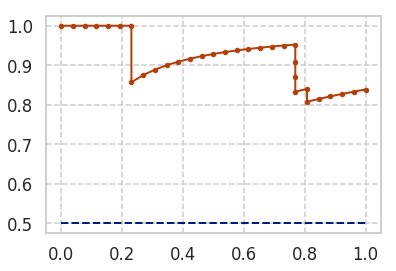

In [62]:
from sklearn.metrics import precision_recall_curve,f1_score,auc,average_precision_score

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate precision-recall AUC
p_r_auc = auc(recall, precision)

# calculate average precision score (y_true,y_score(prob)) = Σ(Rₙ - Rₙ₋₁)/Pₙ 
# where Pₙ and Rₙ are the precision and recall at the nᵗʰ threshold.
ap = average_precision_score(y_test, pred_test) 

# calculate F1 score - F1 = 2 * (precision * recall) / (precision + recall)
f1 = f1_score(y_test, pred_test)


#print(f'precision=%.3f \n recall=%.3f \n thresholds=%.3f p_r_auc=%.3f avg_precision=%.3f f1=%.3f' % (precision, recall, thresholds,p_r_auc,ap,f1))
print(precision,"\n", recall,"\n", thresholds,"\n","\n",p_r_auc,"\n",ap,"\n",f1)



def plot_precision_recall_curve(recall,precision):
  # plot no skill
  plt.plot([0, 1], [0.5, 0.5], linestyle='--')
  # plot the precision-recall curve for the model
  plt.plot(recall, precision, marker='.')
  # show the plot
  plt.show()
  
  
plot_precision_recall_curve(recall,precision)

## AIC, BIC

0.0001 [1.54939815 1.59742004 4.        ] [100.          98.04502771  48.58281172]
0.0001 [1.54939815 1.59742004 4.        ] [100.          95.43985752  43.37247135]


Text(0.5, 1.0, 'Information-criterion for model selection (training time 0.002s)')

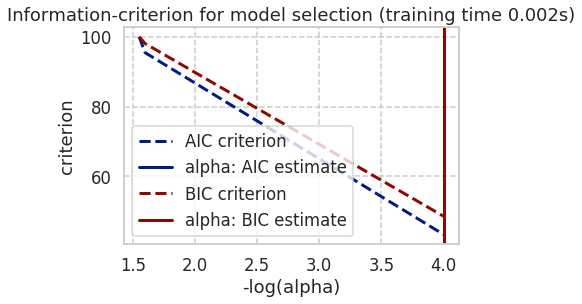

In [91]:
import time
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4
# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_
print(alpha_bic_+ EPSILON,-np.log10(model_bic.alphas_+ EPSILON), model_bic.criterion_)
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_
print(alpha_aic_+ EPSILON,-np.log10(model_aic.alphas_+ EPSILON), model_aic.criterion_)

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

In [112]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll
print(log_likelihood(X_test_,y_test,theta_min))
print(np.sum(estimator.predict_log_proba(X)[:,1]))
print(np.sum(estimator.predict_proba(X)[:,1]))
print(log_loss(y_test, estimator.predict_proba(X_test)))

-8.723904985766588
-53.72261344964731
61.140885279687375
0.48868182999625365


In [116]:
estimator.intercept_

array([-2.9469674])

In [0]:
estimator.predict_proba(X_test) #[0.47594995, 0.52405005]

In [0]:
estimator.predict_log_proba(X_test)#[-0.74244258, -0.64616809]

In [106]:
theta_min

array([-25.16131863,   0.20623159,   0.20147149])

## Cross-validation

cross_val_score

GridSearchCV

In [119]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, X, y, cv=5)
scores       

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.8 , 0.8 , 0.8 , 0.95, 0.8 ])

In [0]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [0]:
parameters = {'C':[0.01,0.1,1,10],'solver':['newton-cg', 'lbfgs',  'sag', 'saga'],'penalty' : ['l2' ,'none']}
from sklearn.model_selection import GridSearchCV
#LR_1 = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
LR_1 = LogisticRegression()
cv = GridSearchCV(LR_1,parameters, cv = 5)
cv.fit(X_train,y_train)
print_results(cv)

# penalty='none' is not supported for the liblinear solver
# Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.
'''
BEST PARAMS: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

0.9 (+/-0.158) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9 (+/-0.158) for {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.617 (+/-0.093) for {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
0.617 (+/-0.093) for {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.9 (+/-0.184) for {'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'}
0.9 (+/-0.184) for {'C': 0.01, 'penalty': 'none', 'solver': 'lbfgs'}
0.617 (+/-0.093) for {'C': 0.01, 'penalty': 'none', 'solver': 'sag'}
0.617 (+/-0.093) for {'C': 0.01, 'penalty': 'none', 'solver': 'saga'}
0.9 (+/-0.184) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9 (+/-0.184) for {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.617 (+/-0.093) for {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
0.617 (+/-0.093) for {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.9 (+/-0.184) for {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
0.9 (+/-0.184) for {'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}
0.617 (+/-0.093) for {'C': 0.1, 'penalty': 'none', 'solver': 'sag'}
0.617 (+/-0.093) for {'C': 0.1, 'penalty': 'none', 'solver': 'saga'}
0.9 (+/-0.184) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9 (+/-0.184) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.617 (+/-0.093) for {'C': 1, 'penalty': 'l2', 'solver': 'sag'}
0.617 (+/-0.093) for {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.9 (+/-0.184) for {'C': 1, 'penalty': 'none', 'solver': 'newton-cg'}
0.9 (+/-0.184) for {'C': 1, 'penalty': 'none', 'solver': 'lbfgs'}
0.617 (+/-0.093) for {'C': 1, 'penalty': 'none', 'solver': 'sag'}
0.617 (+/-0.093) for {'C': 1, 'penalty': 'none', 'solver': 'saga'}
0.9 (+/-0.184) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9 (+/-0.184) for {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.617 (+/-0.093) for {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.617 (+/-0.093) for {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.9 (+/-0.184) for {'C': 10, 'penalty': 'none', 'solver': 'newton-cg'}
0.9 (+/-0.184) for {'C': 10, 'penalty': 'none', 'solver': 'lbfgs'}
0.617 (+/-0.093) for {'C': 10, 'penalty': 'none', 'solver': 'sag'}
0.617 (+/-0.093) for {'C': 10, 'penalty': 'none', 'solver': 'saga'}
'''

In [135]:
print(cv.best_estimator_)
print(cv.best_score_)
print(cv.best_params_)
print(cv.score(X_test,y_test))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
0.9
{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.85


## scikitplot 

In [140]:
pip install scikit-plot

In [147]:
len(probs)
len(y_test)

40

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


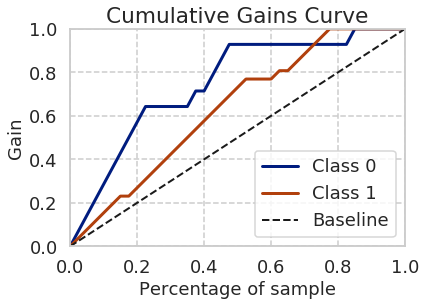

In [152]:
from scikitplot.metrics import plot_cumulative_gain
plot_cumulative_gain(y_test, estimator.predict_proba(X_test))

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


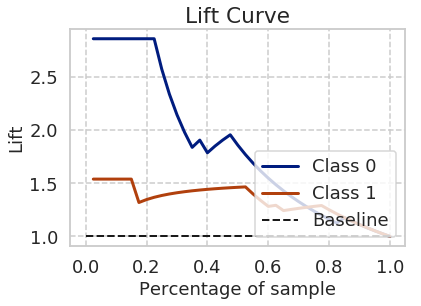

In [153]:
from scikitplot.metrics import plot_lift_curve
# Plot the lift curve
plot_lift_curve(y_test, estimator.predict_proba(X_test))
plt.show()

## Gini Coefficient

**Gini above 60% is a good model. For the case in hand we get Gini as 92.7%.**

In [154]:
2*p_r_auc - 1

0.8351469212439331

In [157]:
2* auc(fpr, tpr) - 1

0.7637362637362637

In [168]:
data.iloc[:,-1]

0     0
1     0
2     0
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    0
12    1
13    1
14    0
15    1
16    1
17    0
18    1
19    1
20    0
21    1
22    0
23    0
24    1
25    1
26    1
27    0
28    0
29    0
     ..
70    0
71    1
72    1
73    1
74    1
75    1
76    1
77    1
78    0
79    0
80    1
81    1
82    1
83    1
84    1
85    1
86    0
87    1
88    1
89    0
90    1
91    1
92    0
93    1
94    1
95    1
96    1
97    1
98    1
99    1
Name: Admitted, Length: 100, dtype: int64

## Somers'd CONCORDANCE and DISCORDANCE

In [170]:
#THE FOLLOWING CODE CALCULATES CONCORDANCE AND DISCORDANCE
def concordance_discordance():
    Probability = estimator.predict_proba(X)
    Probability1 = pd.DataFrame(Probability)
    Probability1.columns = ['Prob_0','Prob_1']
    TruthTable = pd.merge(data.iloc[:,-1], Probability1[['Prob_1']], how='inner', left_index=True, right_index=True)
    print(TruthTable.head())
    zeros = TruthTable[(TruthTable.iloc[:,0]==0)].reset_index().drop(['index'], axis = 1)
    ones = TruthTable[(TruthTable.iloc[:,0]==1)].reset_index().drop(['index'], axis = 1)
    from bisect import bisect_left, bisect_right
    zeros_list = sorted([zeros.iloc[j,1] for j in zeros.index])
    zeros_length = len(zeros_list)
    disc = 0
    ties = 0
    conc = 0
    for i in ones.index:
        cur_conc = bisect_left(zeros_list, ones.iloc[i,1])
        cur_ties = bisect_right(zeros_list, ones.iloc[i,1]) - cur_conc
        conc += cur_conc
        ties += cur_ties
    pairs_tested = zeros_length * len(ones.index)
    disc = pairs_tested - conc - ties
    print('Pairs = ', pairs_tested)
    print('Conc = ', conc)
    print('Disc = ', disc)
    print('Tied = ', ties)
    concordance = round(conc/pairs_tested,2)
    discordance = round(disc/pairs_tested,2)
    ties_perc = round(ties/pairs_tested,2)
    Somers_D = round((conc - disc)/pairs_tested,2)
    print('Concordance = ', concordance, '%')
    print('Discordance = ', discordance, '%')
    print('Tied = ', ties_perc, '%')
    print('Somers D = ', Somers_D)
concordance_discordance()

   Admitted    Prob_1
0         0  0.380022
1         0  0.239635
2         0  0.373267
3         1  0.645897
4         1  0.760383
Pairs =  2400
Conc =  2219
Disc =  181
Tied =  0
Concordance =  0.92 %
Discordance =  0.08 %
Tied =  0.0 %
Somers D =  0.85


## Kolomogorov Smirnov chart
[link](https://www.datavedas.com/model-evaluation-in-python/)

In [0]:
def Kolomogorov_Smirnov_chart(data):
	df1 = pd.pivot_table(data=Train_Data1,index=['Decile'],values=['Defaulter','Non-Defaulter','Probability'],
	                     aggfunc={'Defaulter':[np.sum],
	                              'Non-Defaulter':[np.sum],
	                              'Probability' : [np.min,np.max]})
	df1.reset_index()
	df1.columns = ['Defaulter_Count','Non-Defaulter_Count','max_score','min_score']
	df1['Total_Cust'] = df1['Defaulter_Count']+df1['Non-Defaulter_Count']
	
	
	df2 = df1.sort_values(by='min_score',ascending=False)
	
	df2['Default_Rate'] = (df2['Defaulter_Count'] / df2['Total_Cust']).apply('{0:.2%}'.format)
	default_sum = df2['Defaulter_Count'].sum()
	non_default_sum = df2['Non-Defaulter_Count'].sum()
	df2['Default %'] = (df2['Defaulter_Count']/default_sum).apply('{0:.2%}'.format)
	df2['Non_Default %'] = (df2['Non-Defaulter_Count']/non_default_sum).apply('{0:.2%}'.format)
	
	df2['ks_stats'] = np.round(((df2['Defaulter_Count'] / df2['Defaulter_Count'].sum()).cumsum() -(df2['Non-Defaulter_Count'] / df2['Non-Defaulter_Count'].sum()).cumsum()), 4) * 100
	flag = lambda x: '*****' if x == df2['ks_stats'].max() else ''
	df2['max_ks'] = df2['ks_stats'].apply(flag)
	return df2

In [216]:
Train_Data1 = pd.DataFrame(y_train)
Train_Data1['Prob'] = estimator.predict_proba(X_train)[:, 1]
Train_Data1['decile'] = pd.qcut(Train_Data1['Prob'],10,labels=['1','2','3','4','5','6','7','8','9','10'])
Train_Data1.columns = ['Defaulter','Probability','Decile']
Train_Data1['Non-Defaulter'] = 1-Train_Data1['Defaulter']

Train_Data1.head()

,Defaulter,Probability,Decile,Non-Defaulter
49,1,0.861262,10,0
34,0,0.406785,2,1
7,1,0.641154,5,0
95,1,0.716682,7,0
27,0,0.759947,8,1


In [219]:
Kolomogorov_Smirnov_chart(Train_Data1)

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats,max_ks
Decile,,,,,,,,,,
10,6,0,0.869832,0.847041,6,100.00%,17.65%,0.00%,17.65,
9,6,0,0.809714,0.772197,6,100.00%,17.65%,0.00%,35.29,
8,5,1,0.768802,0.754434,6,83.33%,14.71%,3.85%,46.15,
7,6,0,0.753353,0.709390,6,100.00%,17.65%,0.00%,63.80,
6,4,2,0.695553,0.661380,6,66.67%,11.76%,7.69%,67.87,
5,5,1,0.651538,0.608318,6,83.33%,14.71%,3.85%,78.73,*****
4,2,4,0.597930,0.488699,6,33.33%,5.88%,15.38%,69.23,
3,0,6,0.482329,0.424284,6,0.00%,0.00%,23.08%,46.15,
2,0,6,0.423319,0.406785,6,0.00%,0.00%,23.08%,23.08,


In [222]:
Test_Data1 = pd.DataFrame(y_test)
Test_Data1['Prob'] = estimator.predict_proba(X_test)[:, 1]
Test_Data1['decile'] = pd.qcut(Test_Data1['Prob'],10,labels=['1','2','3','4','5','6','7','8','9','10'])
Test_Data1.columns = ['Defaulter','Probability','Decile']
Test_Data1['Non-Defaulter'] = 1-Test_Data1['Defaulter']

Test_Data1.head()


,Defaulter,Probability,Decile,Non-Defaulter
83,1,0.524050,4,0
53,0,0.320410,1,1
70,0,0.255222,1,1
45,0,0.543850,5,1
44,0,0.415971,2,1


In [223]:
Kolomogorov_Smirnov_chart(Test_Data1)

,Defaulter_Count,Non-Defaulter_Count,max_score,min_score,Total_Cust,Default_Rate,Default %,Non_Default %,ks_stats,max_ks
Decile,,,,,,,,,,
10,6,0,0.869832,0.847041,6,100.00%,17.65%,0.00%,17.65,
9,6,0,0.809714,0.772197,6,100.00%,17.65%,0.00%,35.29,
8,5,1,0.768802,0.754434,6,83.33%,14.71%,3.85%,46.15,
7,6,0,0.753353,0.709390,6,100.00%,17.65%,0.00%,63.80,
6,4,2,0.695553,0.661380,6,66.67%,11.76%,7.69%,67.87,
5,5,1,0.651538,0.608318,6,83.33%,14.71%,3.85%,78.73,*****
4,2,4,0.597930,0.488699,6,33.33%,5.88%,15.38%,69.23,
3,0,6,0.482329,0.424284,6,0.00%,0.00%,23.08%,46.15,
2,0,6,0.423319,0.406785,6,0.00%,0.00%,23.08%,23.08,


## Kullback-Leibler divergence
It is commonly used to measure loss in machine learning – and often used in the form of cross-entropy [2].

KL:  0.4999997133484283


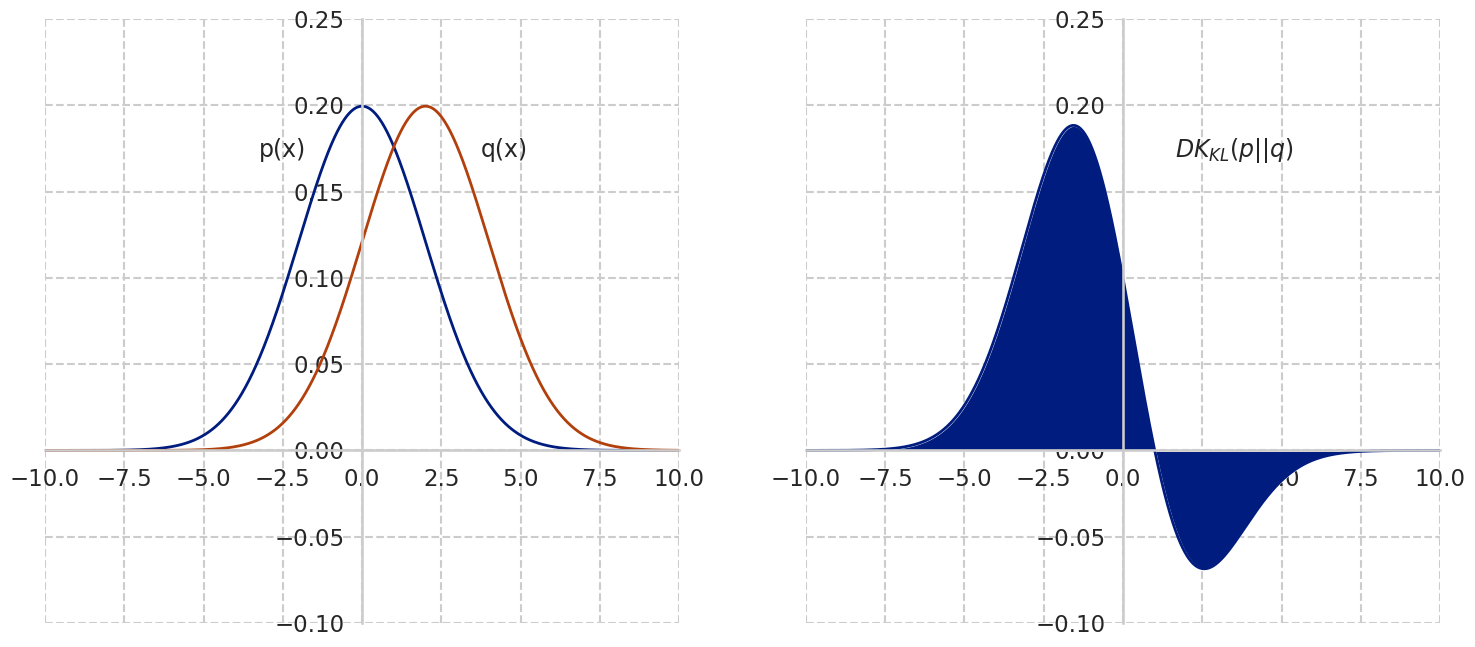

In [224]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

from scipy.stats import norm
from scipy.integrate import quad

def p(x):
    return norm.pdf(x, 0, 2)

def q(x):
    return norm.pdf(x, 2, 2)

def KL(x):
    return p(x) * np.log( p(x) / q(x) )

range = np.arange(-10, 10, 0.001)

KL_int, err = quad(KL, -10, 10) 
print( 'KL: ', KL_int )

fig = plt.figure(figsize=(18, 8), dpi=100)

#---------- First Plot

ax = fig.add_subplot(1,2,1)
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim(-10,10)
ax.set_ylim(-0.1,0.25)

ax.text(-2.5, 0.17, 'p(x)', horizontalalignment='center',fontsize=17)
ax.text(4.5, 0.17, 'q(x)', horizontalalignment='center',fontsize=17)

plt.plot(range, p(range))
plt.plot(range, q(range))

#---------- Second Plot

ax = fig.add_subplot(1,2,2)
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim(-10,10)
ax.set_ylim(-0.1,0.25)

ax.text(3.5, 0.17, r'$DK_{KL}(p||q)$', horizontalalignment='center',fontsize=17)

ax.plot(range, KL(range))

ax.fill_between(range, 0, KL(range))

plt.savefig('KullbackLeibler.png',bbox_inches='tight')
plt.show()

In [0]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [241]:
X_norm , mean , std = featureNormalization(X)
print(sum(estimator.predict_proba(X_norm)[:,0]))
print(sum((estimator.predict_proba(X_norm)[:,1])))

95.00853138736687
4.991468612633083


In [236]:
from scipy.stats import entropy
entropy(estimator.predict_proba(X_norm)[:,0], qk=estimator.predict_proba(X_norm)[:,1])

0.0008118536910079976